In [3]:
# 標準使用ライブラリー
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import os
import shutil

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json
import datetime
import math
plt.style.use('dark_background')

# debug
#%pdb on

import pixiedust #%pixie_debugger

In [38]:
from pathlib import Path
import ffmpeg

In [39]:
MOVIE_DIR = Path("/home/input/openpose_tryout/movies/")
MOVIE2IMG_DIR = Path( "/home/input/openpose_tryout/movies_output/")


In [125]:
##################################
#  独自ライブラリー： mshow
# (複数に対応したノートブック上画像表示)
##################################
import cv2;import numpy as np;import matplotlib as mpl;import matplotlib.pyplot as plt
%matplotlib inline
def mshow(img1, img2=None, img3=None, img4=None, img5=None):

    imgs = list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5])) 
    
    
    if len(imgs) == 1:
        # 一枚のとき
        imgs[0] = imgs[0].astype(np.uint8)
        im4p = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
        plt.imshow(im4p)

    else:
        # 複数枚のとき。横に並べていく
        plt.figure(figsize=(len(imgs)*4, len(imgs)*4))
        fig_exh_base = 100+len(imgs)*10
        for idx, tmp_img in enumerate(imgs):
            tmp_img = tmp_img.astype(np.uint8)
            tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(fig_exh_base+idx+1)
            plt.imshow(tmp_im4p)

In [121]:
# def prior_convert(file):
#     '''mov, mp4 を jpg, mp3に分離する'''
#     mp4_output_path = file.parent / "{}.mp4".format(file.stem)
#     mp3_output_path = file.parent / "{}.mp3".format(file.stem)
#     jpg_output_path = SDANCE_CACHE_INPUT_IMAGE_DIR / "%06d.jpg"
#     SDANCE_CACHE_INPUT_IMAGE_DIR
#     # mp4が存在しなければmovをmp4に変換する
#     if not mp4_output_path.is_file():
#         ffmpeg.input(str(file)) \
#         .output(filename=str(mp4_output_path), pix_fmt='yuv420p') \
#         .run()
#     # mp4から音声mp3を抽出する
#     if mp3_output_path.is_file():
#         mp3_output_path.unlink()
#     ffmpeg.input(str(mp4_output_path)) \
#     .output(filename=str(mp3_output_path), map='0:1') \
#     .run()
#     # mp4から画像jpgを抽出する
#     for f in SDANCE_CACHE_INPUT_IMAGE_DIR.glob("*.jpg"):
#         f.unlink()
#     ffmpeg.input(str(mp4_output_path)) \
#     .output(filename=str(jpg_output_path), ss=0, r=30000/1001, start_number=000000) \
#     .run()

In [122]:
stream = ffmpeg.input(str(MOVIE_DIR) + "/moriwaki_360.mp4")

In [123]:
tmp_dir =  "./tmp_img"
os.path.exists(tmp_dir)

True

In [130]:
probe = ffmpeg.probe(str(MOVIE_DIR) + "/moriwaki_360.mp4")

22

In [128]:
###########################
# 動画読み込みチェック
###########################
import cv2;
def checkMoviePerSecound ( stream) : 
    tmp_dir =  Path("./tmp_img")

    if not os.path.exists(str(tmp_dir)):
        os.mkdir(str(tmp_dir))
        
    for f in tmp_dir.glob("*.jpg"):
        f.unlink()

        
    movie_duration = int(float(probe['streams'][0]["duration"])//1)
    check_duration = movie_duration if movie_duration < 25 else 25
    
    for sec in range(1,movie):
        ffmpeg.output(stream, str(tmp_dir)+"/" + str(sec)  +".jpg", ss=sec, vframes=1, f='image2').run()
#         ffmpeg.output(stream, tmp_dir+"/" ".jpg", ss=sec, vframes=1, f='image2').run()

    imgs = []
    for idx in range(1,5):
        tmp_img = cv2.imread(str(tmp_dir) + "/" +str(idx)+".jpg" )
        
        imgs.append( tmp_img   )
        
    
    mshow(imgs[0],imgs[1],imgs[2],imgs[3])


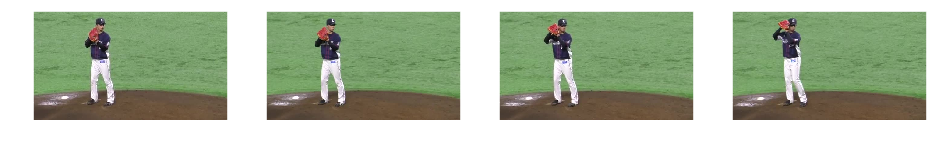

In [129]:
checkMoviePerSecound(stream)

In [56]:
# 画像を空にする
for f in MOVIE2IMG_DIR.glob("*.jpg"):
    f.unlink()

In [65]:
stream.output(
    filename=str(MOVIE2IMG_DIR / "%06d.jpg"), ss=0, r=30000/1001, start_number=000000)\
    .run()
#     filename= str("/home/input/openpose_tryout/movies_output/")+"%06d.jpg", ss=0, r=30000/1001, start_number=000000)\
#     filename= "/home/input/openpose_tryout/movies/"+"%06d.jpg", ss=0, r=30000/1001, start_number=000000)\
#     filename= "/home/input/openpose_tryout/movies/1.jpg", ss=0, r=30000/1001) \


(None, None)